<a href="https://colab.research.google.com/github/LatiefDataVisionary/audio-noise-feature-analysis/blob/main/notebooks/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **High-Level Feature Analysis of Environmental Noise**

## **1. Project Setup and Initialization**

### **1.1 Introduction**

This project aims to analyze and visualize high-level audio features, specifically Spectrogram and Chroma Features, extracted from a dataset of 10 different environmental noise types. This analysis serves as a Capstone project for the "High Level Speech Feature" course provided by BISA AI Academy. The dataset used is the "Audio Noise Dataset" sourced from Kaggle, containing various types of environmental noise in `.webm` format. The goal is to demonstrate how these features can help differentiate between distinct sound sources visually.

### **1.2 Library Installation and Imports**

We will begin by installing and importing the necessary Python libraries for audio processing, visualization, and file handling.

In [ ]:
# Install necessary libraries
# !pip install librosa matplotlib numpy seaborn ffmpeg

In [6]:
# Import necessary libraries
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import glob
import subprocess
import os

### **1.3 Mounting Google Drive**

The dataset is assumed to be stored in Google Drive. We will mount Google Drive to access the audio files. Please ensure your dataset is located in the specified path within your Drive.

Dataset Link: https://drive.google.com/drive/folders/1UXBlA2QRT6jaidknV9t7R7a7LGQjwdNt?usp=sharing

In [2]:
# Mount Google Drive to access the dataset
drive.mount('/content/drive')

Mounted at /content/drive


### **1.4 Path and Constant Definition**

Define the paths for the raw dataset in Google Drive and the directory where converted audio files will be stored. We will also create the output directory if it doesn't exist.

In [3]:
# Define paths
DRIVE_DATASET_PATH = '/content/drive/MyDrive/Dataset/Audio Noise Dataset Myanmar/'
PROCESSED_DATA_PATH = 'processed_audio'

# Create the processed audio directory if it doesn't exist
if not os.path.exists(PROCESSED_DATA_PATH):
    os.makedirs(PROCESSED_DATA_PATH)
    print(f"Created directory: {PROCESSED_DATA_PATH}")
else:
    print(f"Directory already exists: {PROCESSED_DATA_PATH}")

Created directory: processed_audio


## **2. Data Pre-processing: Audio Format Conversion**

### **2.1 The Need for Conversion**

Audio files in the original dataset are in the `.webm` format. While this format is common, the `librosa` library, which is essential for our feature extraction tasks, works optimally with more standard audio formats like `.wav`. Therefore, we need to convert the `.webm` files to `.wav` format before proceeding with the analysis.

### **2.2 Conversion Script**

This script will scan the specified Google Drive directory for `.webm` files and convert each one to a `.wav` file with a sample rate of 22050 Hz and a single audio channel (mono). The converted files will be saved in the `processed_audio` directory.

In [5]:
webm_files = glob.glob(os.path.join(DRIVE_DATASET_PATH, '*.webm'))
converted_count = 0

for webm_file in webm_files:
    file_name = os.path.basename(webm_file)
    base_name, _ = os.path.splitext(file_name)
    wav_file = os.path.join(PROCESSED_DATA_PATH, f"{base_name}.wav")

    if not os.path.exists(wav_file):
        print(f"Converting {file_name} to {base_name}.wav...")
        try:
            # Use ffmpeg to convert webm to wav
            subprocess.run([
                'ffmpeg', '-i', webm_file,
                '-ar', '22050',  # Set sample rate to 22050 Hz
                '-ac', '1',      # Set audio channels to 1 (mono)
                wav_file
            ], check=True, capture_output=True, text=True)
            converted_count += 1
        except subprocess.CalledProcessError as e:
            print(f"Error converting {file_name}: {e.stderr}")
    else:
        print(f"{base_name}.wav already exists. Skipping conversion.")

if converted_count > 0:
    print("Conversion process finished.")
else:
    print("No new files to convert or all files already exist.")

print("All files processed.")

Converting sample-1 a crowded place.webm to sample-1 a crowded place.wav...
Converting sample-2 urban areas with people talking.webm to sample-2 urban areas with people talking.wav...
Converting sample-8 a working place.webm to sample-8 a working place.wav...
Converting sample-3 the restaurant.webm to sample-3 the restaurant.wav...
Converting sample-10 motorbike and people talking .webm to sample-10 motorbike and people talking .wav...
Converting sample-9 a festival.webm to sample-9 a festival.wav...
Converting sample-7 the rainy day.webm to sample-7 the rainy day.wav...
Converting sample-6 painful sounds.webm to sample-6 painful sounds.wav...
Converting sample-4 mosquitos .webm to sample-4 mosquitos .wav...
Converting sample-5 car traffic.webm to sample-5 car traffic.wav...
Conversion process finished.
All files processed.


## **3. Feature Extraction and Visualization**

### **3.1 Loading Audio Data**

Now that the audio files are in the `.wav` format, we can load them using `librosa.load()`. We will create a list of all the processed `.wav` files to iterate through for feature extraction.

In [7]:
# Get a list of all processed WAV files and sort them
wav_files = sorted(glob.glob(os.path.join(PROCESSED_DATA_PATH, '*.wav')))

print(f"Found {len(wav_files)} WAV files in {PROCESSED_DATA_PATH}")
# Display the list of files found
print("\nList of files:")
for f in wav_files:
    print(f)

Found 10 WAV files in processed_audio

List of files:
processed_audio/sample-1 a crowded place.wav
processed_audio/sample-10 motorbike and people talking .wav
processed_audio/sample-2 urban areas with people talking.wav
processed_audio/sample-3 the restaurant.wav
processed_audio/sample-4 mosquitos .wav
processed_audio/sample-5 car traffic.wav
processed_audio/sample-6 painful sounds.wav
processed_audio/sample-7 the rainy day.wav
processed_audio/sample-8 a working place.wav
processed_audio/sample-9 a festival.wav


### **3.2 Spectrogram Analysis**

A Spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time. It shows the intensity of different frequencies over time, where the x-axis represents time, the y-axis represents frequency, and the color intensity represents the amplitude (loudness) at that frequency and time. Spectrograms are highly useful for analyzing audio signals as they can reveal patterns and characteristics that are not easily discernible in the raw waveform, making them valuable for differentiating various sound types.

Generating Spectrograms...


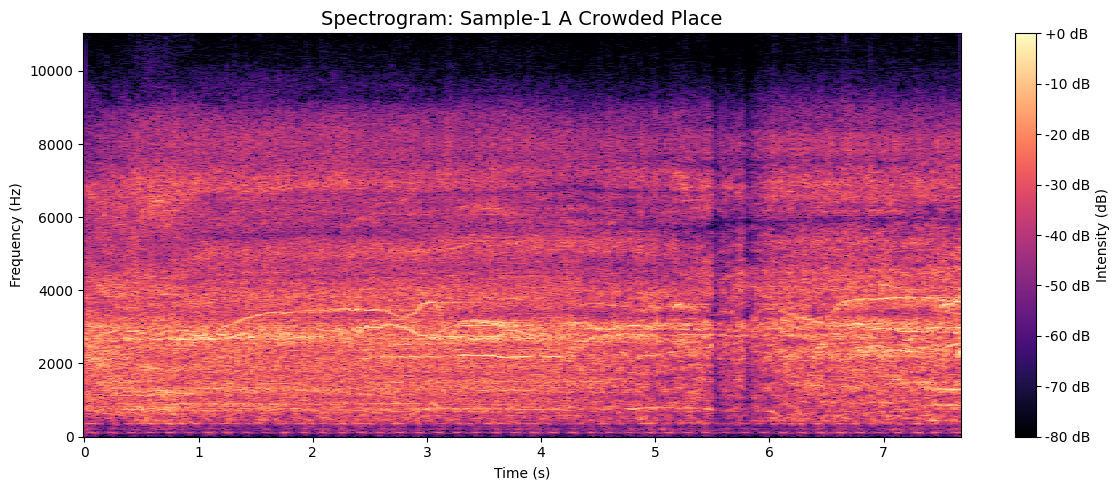

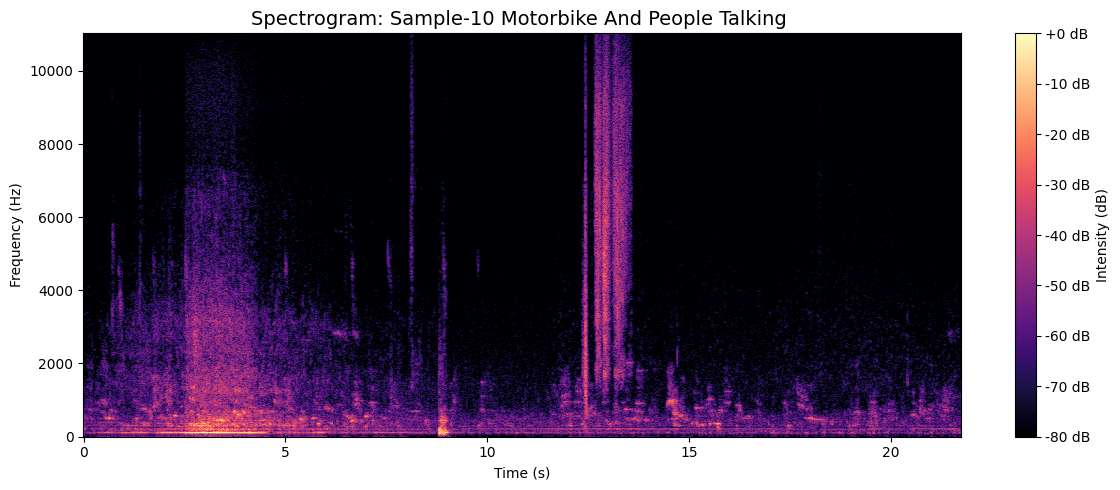

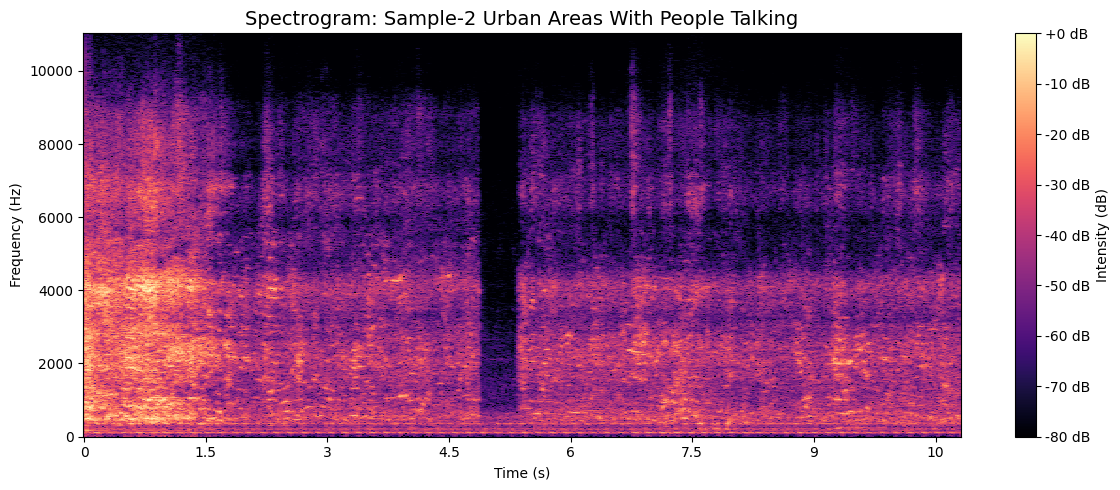

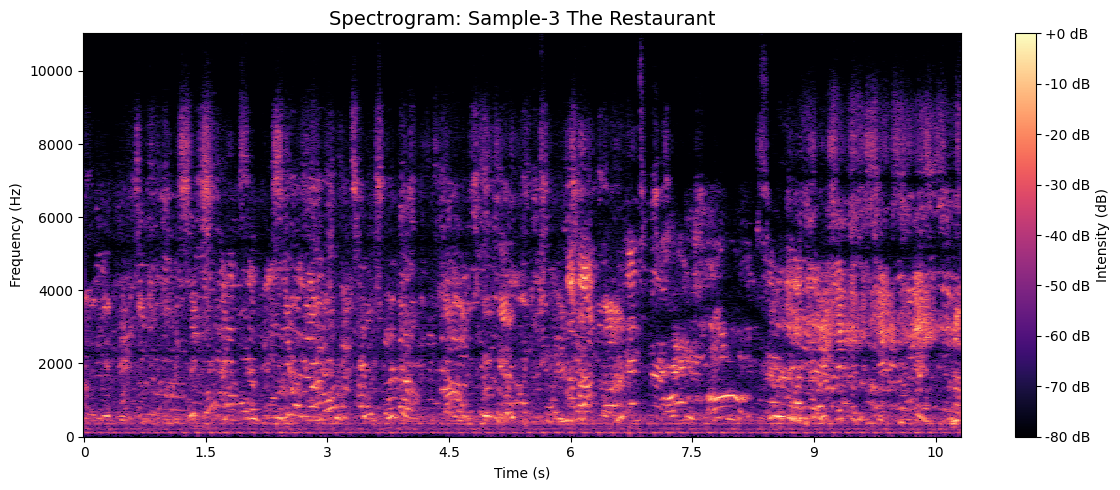

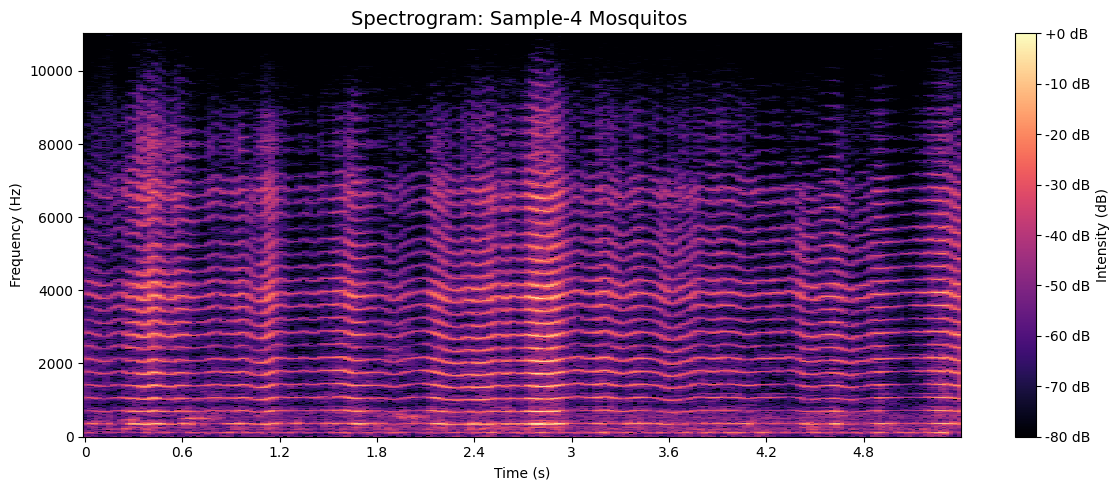

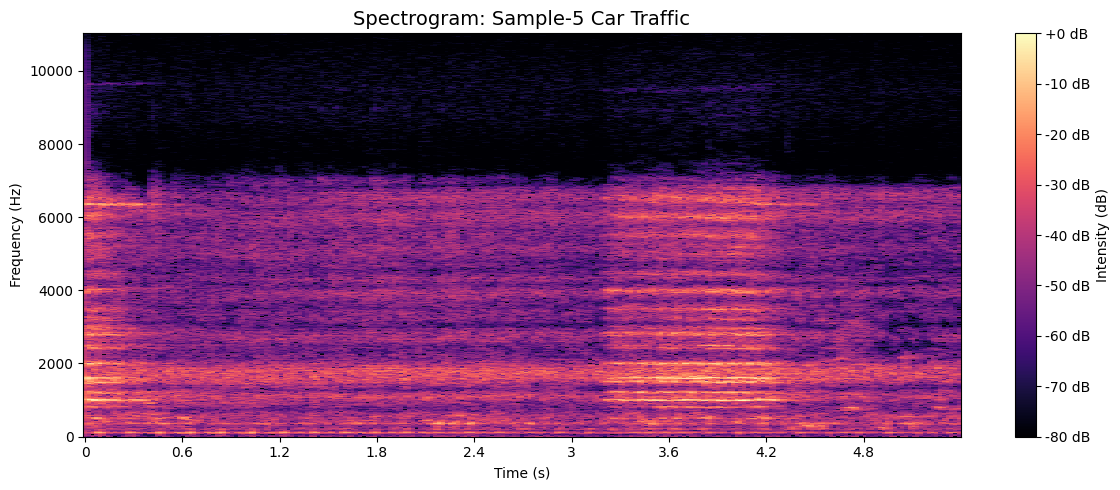

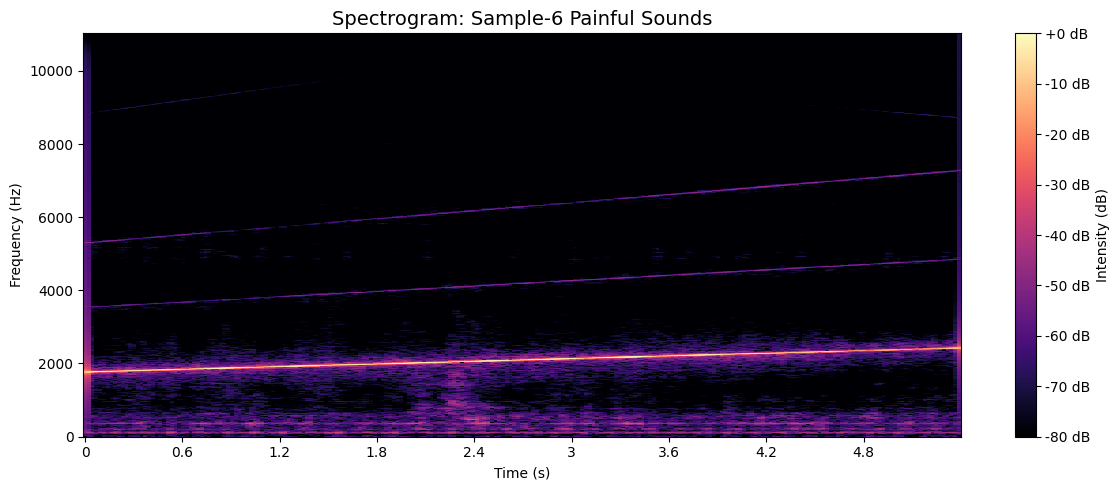

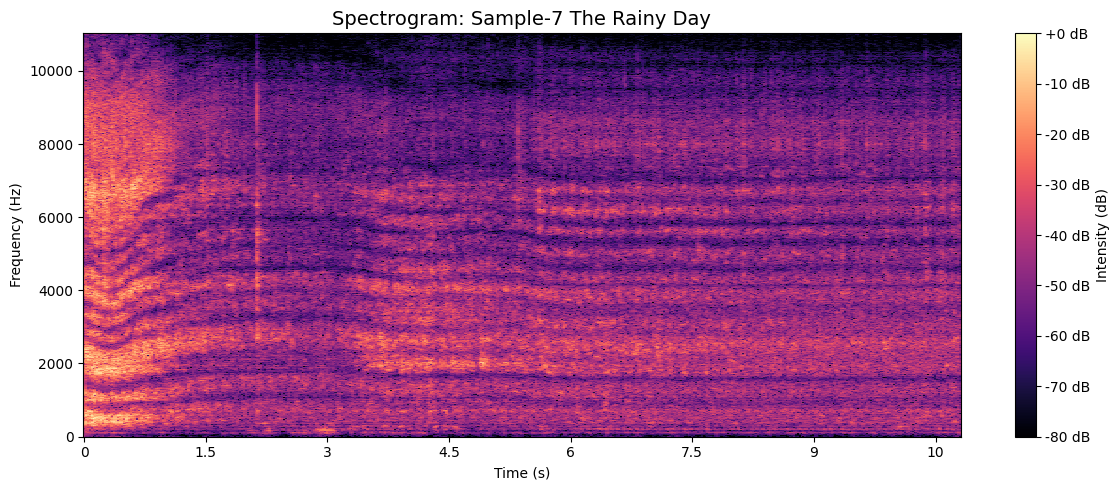

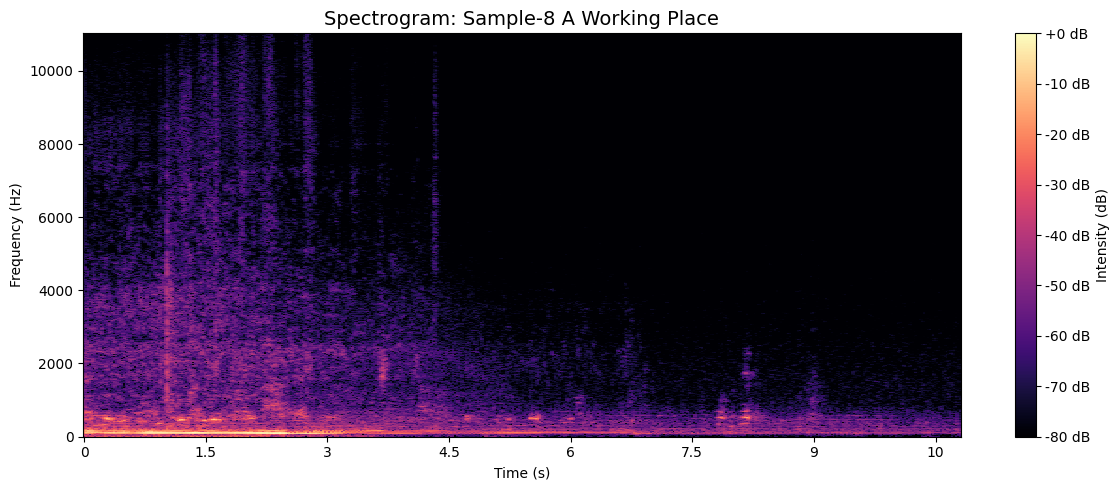

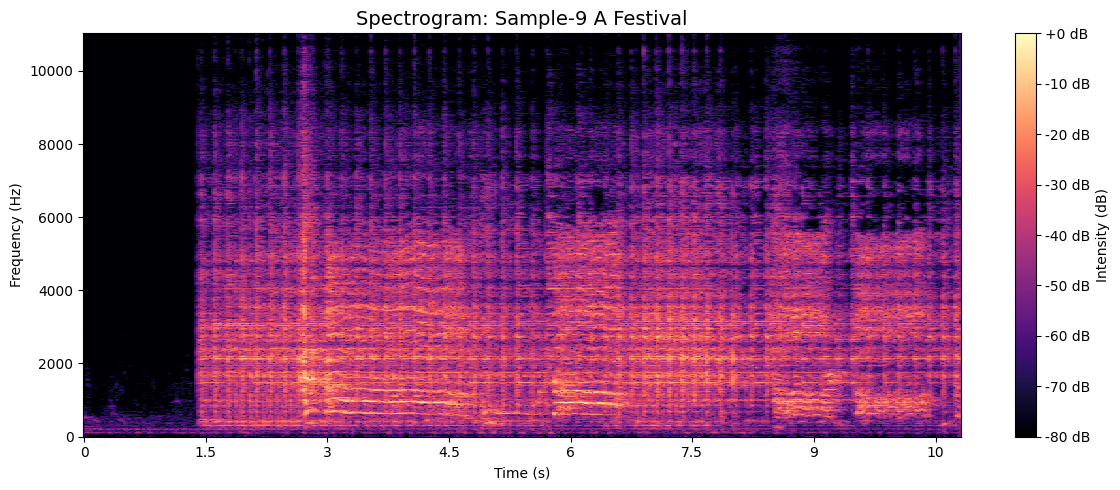

Spectrogram generation complete.


In [8]:
# Spectrogram visualization for each audio file
print("Generating Spectrograms...")
for wav_file in wav_files:
    try:
        y, sr = librosa.load(wav_file, sr=22050) # Load with defined sample rate

        # Compute the Short-Time Fourier Transform (STFT)
        D = librosa.stft(y)

        # Convert to decibels
        D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

        plt.figure(figsize=(12, 5))
        librosa.display.specshow(D_db, sr=sr, x_axis='time', y_axis='hz')

        # Extract noise type from file name for title
        file_name = os.path.basename(wav_file)
        noise_type = os.path.splitext(file_name)[0].replace('_', ' ').title() # Basic cleaning for title

        plt.title(f'Spectrogram: {noise_type}', fontsize=14)
        plt.colorbar(format='%+2.0f dB', label='Intensity (dB)')
        plt.xlabel('Time (s)')
        plt.ylabel('Frequency (Hz)')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error processing {wav_file}: {e}")

print("Spectrogram generation complete.")

### **3.3 Chroma Feature Analysis**

Chroma features, also known as chromagrams, are a representation of the spectral energy distribution across the 12 standard pitch classes of the musical octave (C, C#, D, D#, E, F, F#, G, G#, A, A#, B). Regardless of the absolute frequency, all energy that falls into a specific pitch class is accumulated into a single bin. While primarily used in music analysis, chromagrams can also be insightful for environmental noise, as they can reveal underlying harmonic structures or dominant tonal components present in sounds like sirens, certain machinery, or even distant music.

Generating Chromagrams...


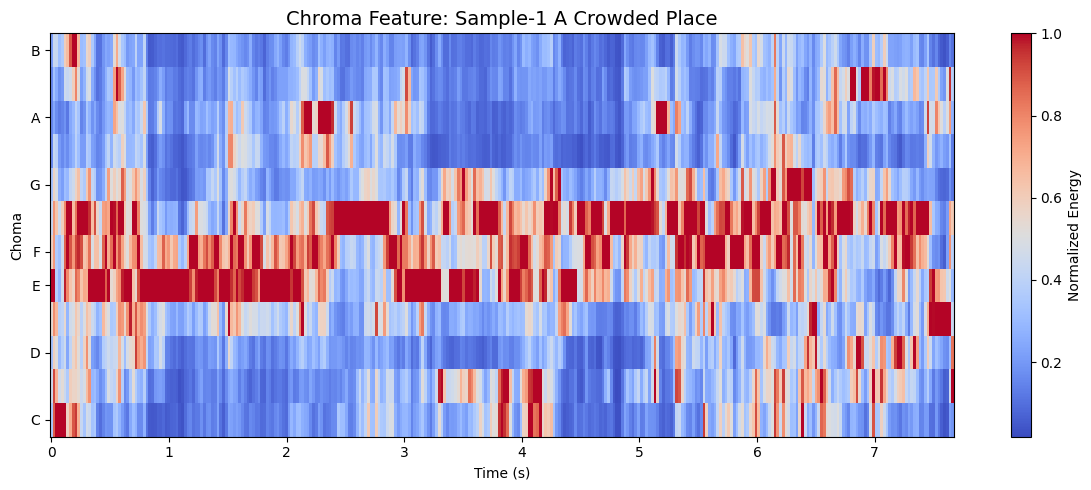

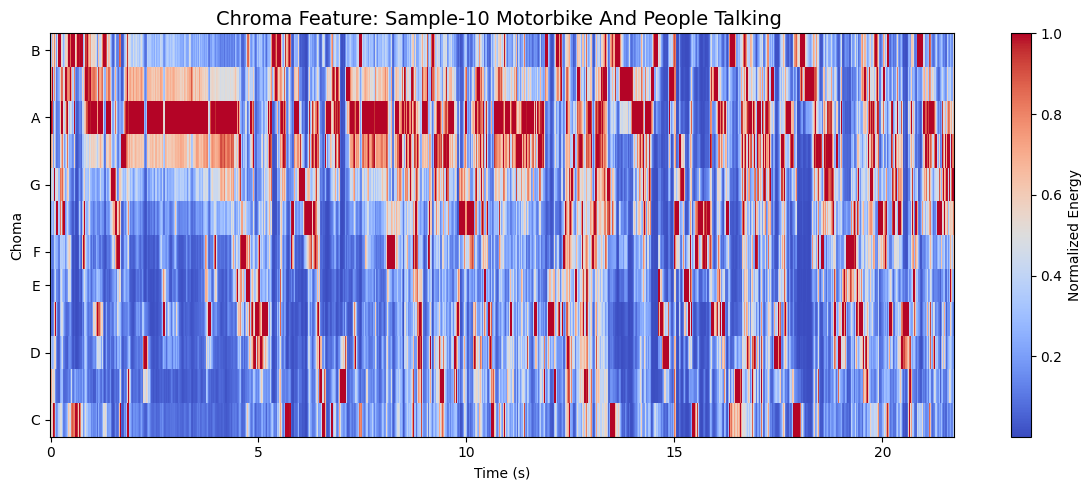

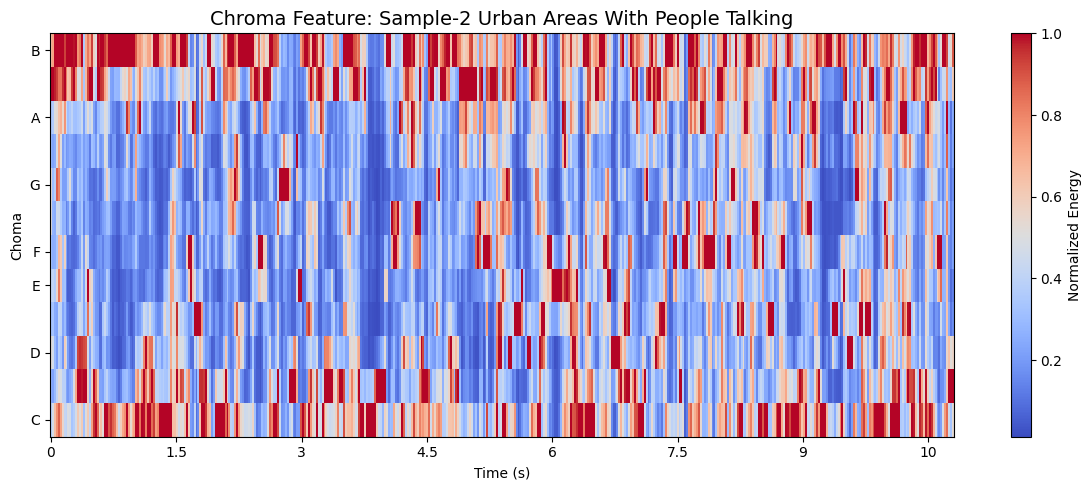

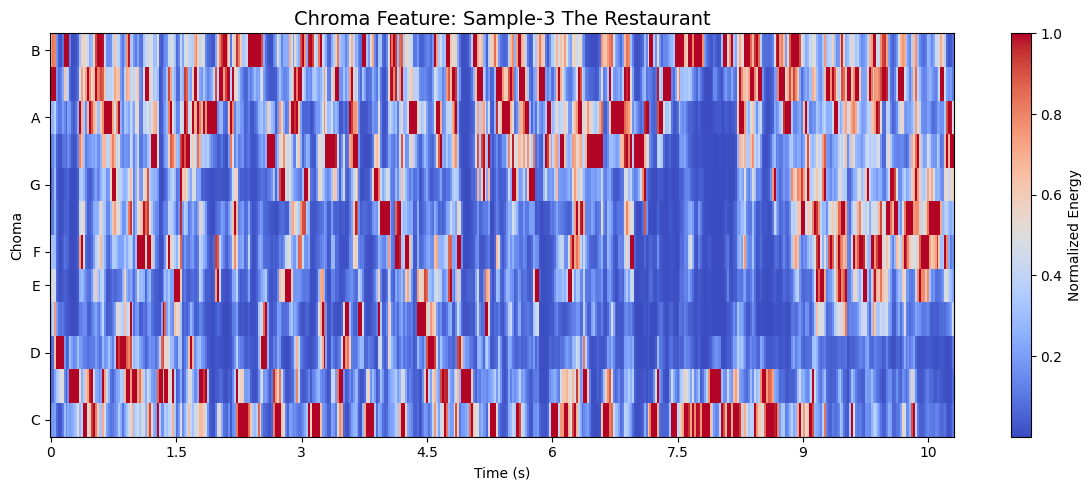

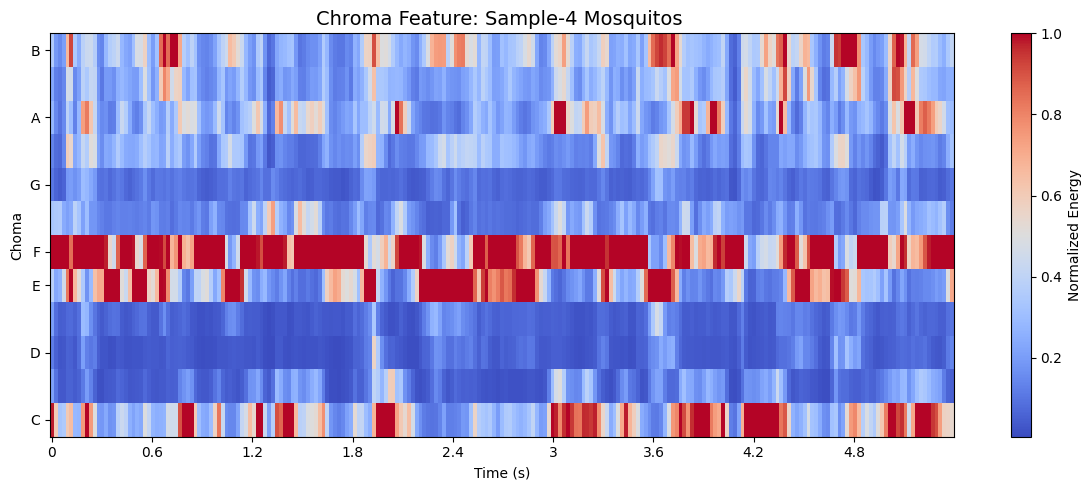

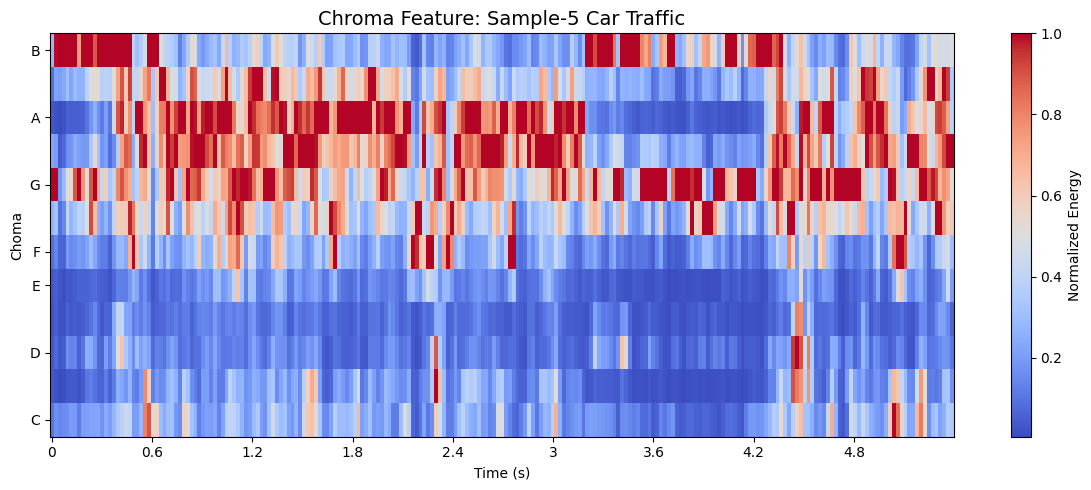

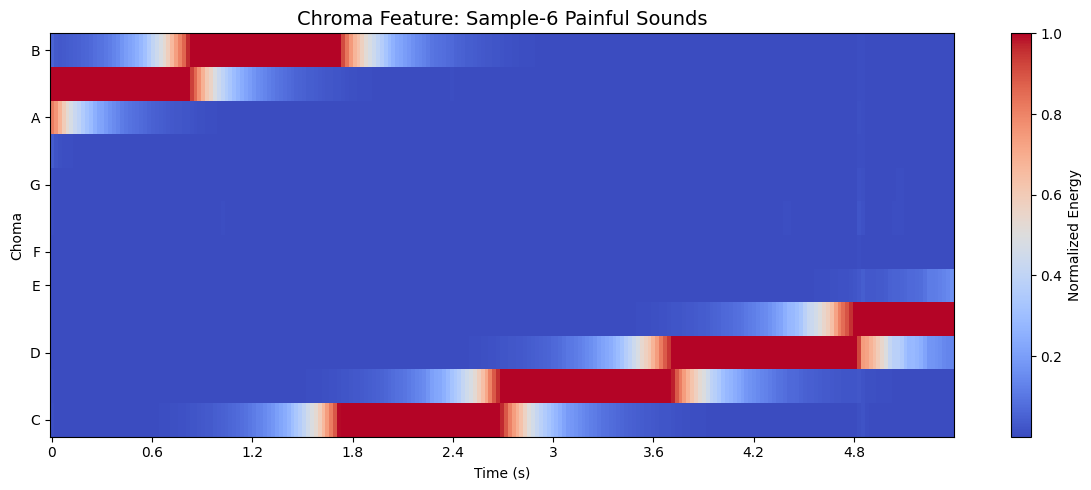

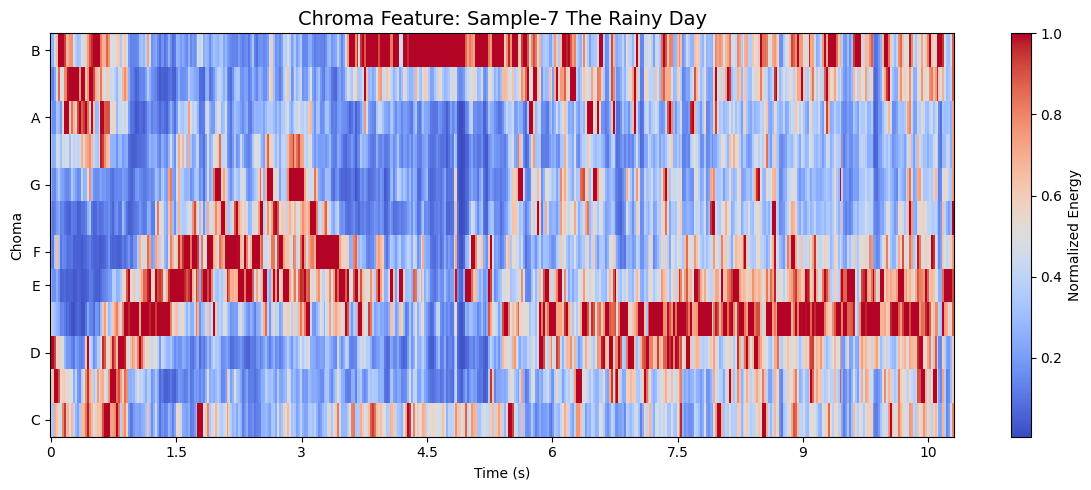

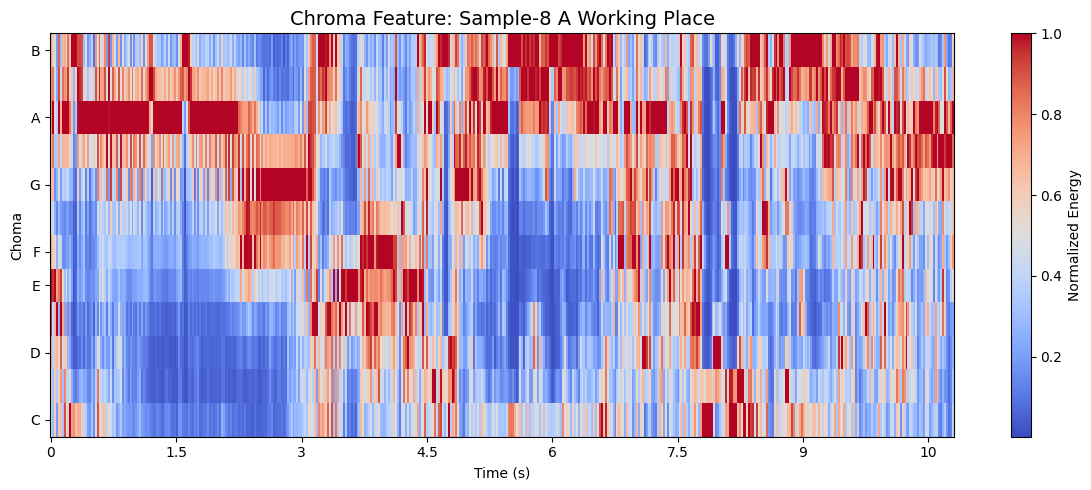

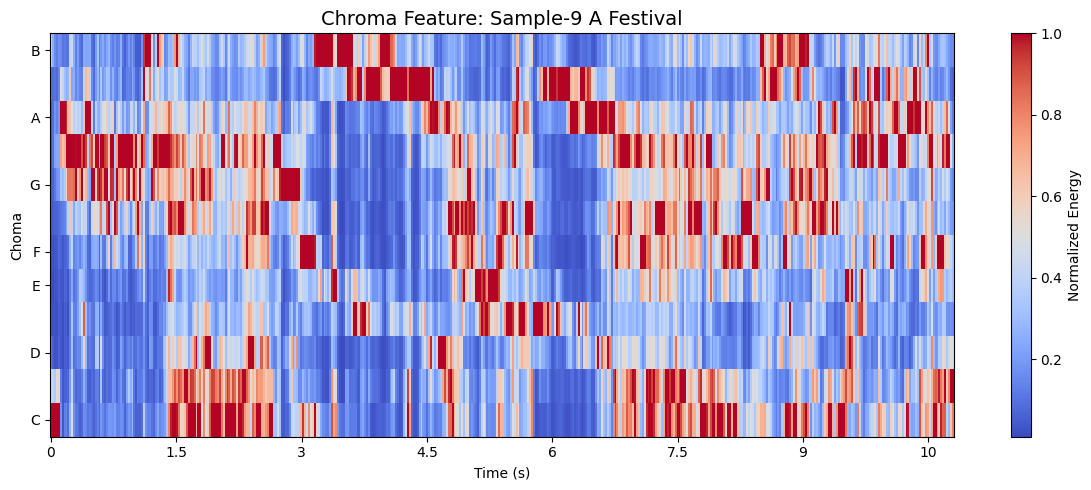

Chromagram generation complete.


In [9]:
# Chroma feature visualization for each audio file
print("Generating Chromagrams...")
for wav_file in wav_files:
    try:
        y, sr = librosa.load(wav_file, sr=22050) # Load with defined sample rate

        # Extract Chroma features
        chromagram = librosa.feature.chroma_stft(y=y, sr=sr)

        plt.figure(figsize=(12, 5))
        librosa.display.specshow(chromagram, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')

        # Extract noise type from file name for title
        file_name = os.path.basename(wav_file)
        noise_type = os.path.splitext(file_name)[0].replace('_', ' ').title() # Basic cleaning for title

        plt.title(f'Chroma Feature: {noise_type}', fontsize=14)
        plt.colorbar(label='Normalized Energy')
        plt.xlabel('Time (s)')
        plt.ylabel('Choma')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error processing {wav_file}: {e}")

print("Chromagram generation complete.")